Starter notebook including data loading and model evaluation cells. Copy it to start a new data augmentation experiment.

### Set up the working directory

In [10]:
root_folder = '/home/seanvernon/cs182/'
import sys
sys.path.insert(0, root_folder)
%cd $root_folder

/home/seanvernon/cs182


### Load the data

In [3]:
import pathlib
import os
import json
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# TODO: add any imports you use here

from torch import nn

from utils.train_model import train_model, plot_stats

In [4]:
# Create a pytorch dataset
data_dir = pathlib.Path('./data/tiny-imagenet-200')
CLASS_NAMES = np.array([item.name for item in (data_dir / 'train').glob('*') if os.path.isdir(item.__str__())])

In [5]:
# Create the training data generator
batch_size = 128
im_height = 64  # 56
im_width = 64  # 56
num_epochs = 1

In [6]:
data_transforms = {x: transforms.Compose([
                          transforms.Resize((224, 224)),
                          transforms.ToTensor(),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
                      for x in ['train', 'val']}
datasets = {x: torchvision.datasets.ImageFolder(data_dir / x, data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True) for x in ['train', 'val']}

print("Training set size: ", len(datasets['train']))
print("Validation set size: ", len(datasets['val']))

Training set size:  100000
Validation set size:  10000


### Baseline model
We create the baseline model by fine-tuning final fully-connected layers of ResNet pre-trained on ImageNet, without any data augmentation techniques.

In [7]:
from torchvision.models import resnet18

In [8]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.model = resnet18(pretrained=True)
        for param in self.model.parameters():
            param.requires_grad = False
        self.model.fc = nn.Linear(512, num_classes)
    
    def forward(self, x):
        return self.model.forward(x)

In [12]:
# Create a model
# TODO: import model used here
model_file = root_folder+'models/baseline_test.pt'  # Change the name to reflect augmentation method
model = Net(len(CLASS_NAMES))
params_to_update = [param for param in model.parameters() if param.requires_grad]
optim = torch.optim.Adam(params_to_update)
criterion = nn.CrossEntropyLoss()
model, stats = train_model(model, dataloaders, criterion, optim, model_file, 20, mode='train')

Epoch 0/19
----------
train Loss: 2.5597 Acc: 0.4508
val Loss: 1.8667 Acc: 0.5401

Epoch 1/19
----------
train Loss: 1.7275 Acc: 0.5776
val Loss: 1.7109 Acc: 0.5737

Epoch 2/19
----------
train Loss: 1.5945 Acc: 0.6011
val Loss: 1.6686 Acc: 0.5813

Epoch 3/19
----------
train Loss: 1.5276 Acc: 0.6150
val Loss: 1.6556 Acc: 0.5849

Epoch 4/19
----------
train Loss: 1.4811 Acc: 0.6251
val Loss: 1.6805 Acc: 0.5855

Epoch 5/19
----------
train Loss: 1.4459 Acc: 0.6326
val Loss: 1.6831 Acc: 0.5848

Epoch 6/19
----------
train Loss: 1.4200 Acc: 0.6373
val Loss: 1.6772 Acc: 0.5828

Epoch 7/19
----------
train Loss: 1.3959 Acc: 0.6425
val Loss: 1.7022 Acc: 0.5741

Epoch 8/19
----------
train Loss: 1.3789 Acc: 0.6472
val Loss: 1.6803 Acc: 0.5866

Epoch 9/19
----------
train Loss: 1.3620 Acc: 0.6509
val Loss: 1.7074 Acc: 0.5793

Epoch 10/19
----------
train Loss: 1.3481 Acc: 0.6536
val Loss: 1.7083 Acc: 0.5843

Epoch 11/19
----------
train Loss: 1.3341 Acc: 0.6565
val Loss: 1.7017 Acc: 0.5856

Ep

### Evaluate the model

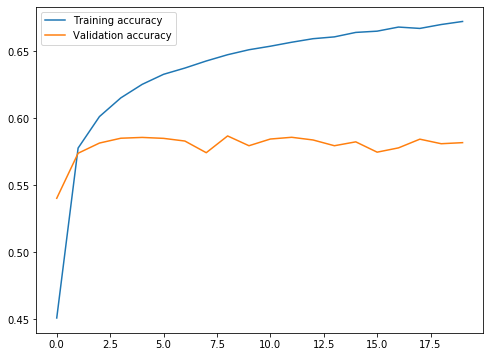

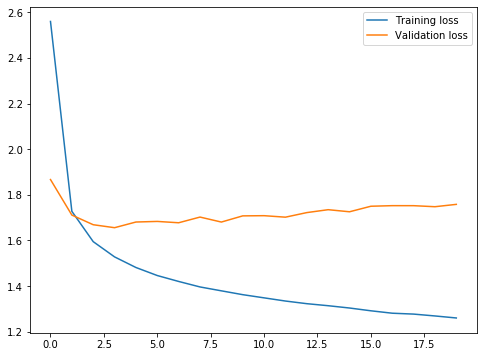

In [13]:
train_acc, train_loss, val_acc, val_loss = stats 
plot_stats(train_acc, train_loss, val_acc, val_loss)

In [14]:
model_file = root_folder+'models/baseline_test.pt'
torch.save(model.state_dict(), model_file)